# 2차원 데이터의 정리

## 두 데이터 사이의 관계를 나타내는 지표
* 영어 점수가 높은 학생일수록 수학 점수도 높은 경향이 있다면, 영어 점수와 수학 점수는 양의 상관관계에 있다고 합니다.
* 반대로 영어 점수가 높은 학생일수록 수학 점수가 낮은 경향이 있다면, 영어 점수와 수학 점수는 음의 상관관계에 있다고 합니다. 
* 혹은 그 어느 쪽에도 해당하지 않고 영어 점수가 수학 점수에 직접적으로 영향을 미치지 않을 때, 영어 점수와 수학 점수는 무상관이라고 합니다. 

In [3]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [4]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')

In [5]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [6]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [7]:
summary_df['product of deviations'].mean()

62.800

#### 공분산

* 데이터의 관계성을 수치로 표현하는 정보가 공분산(covariance)입니다.
* 공분산은 분산에 가까운 지표입니다.
* 공분산은 흔히 S_xy로 표기합니다. 변수 x와 변수 y의 공분산임을 나타냅니다.

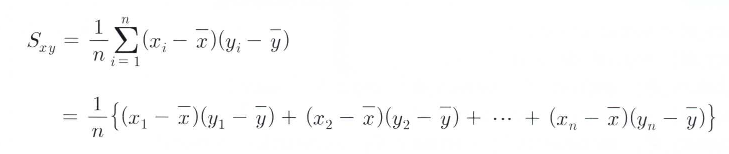

* numpy의 경우, 공분산은 cov함수로 구할 수 있습니다. 다만 반환값은 공분산값이 아닌 공분산 행렬(covariance matrix) 또는 분산공분산 행렬(variance-covariance matrix)라고 부릅니다.

In [8]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [9]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [10]:
cov_mat[0, 0], cov_mat[1, 1]

(86.0, 68.44000000000001)

In [11]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

### 상관계수
* 공분산을 계산하여 데이터의 상관관계를 표현
* 같은 시험 점수들 간에 공분산은 (점수 x 점수)라는 단위를 사용
* 학생의 키와 시험 점수의 상관관계를 살펴보면, 공분산 (cm x 점수)라는 단위가 나옵니다.
* 분산의 경우와 마찬가지로 이런 단위는 직감적으로 이해하기 어려운 단점이 존재

* 단위에 의존하지 않는 상관을 나타내는 지표가 필요합니다.
* 공분산은 각 데이터의 단위를 곱한 것이므로, 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않는 지표를 정의

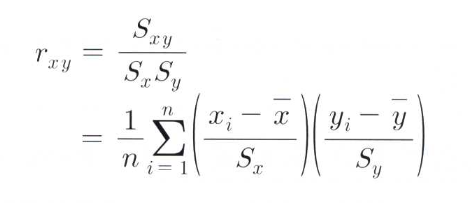

* 위에서 정의된 지표를 상관계수(correlation coefficient)라고 합니다. 
* 상관계수는 반드시 -1과 1사이의 값을 취하고, 데이터가 양의 상관관계에 놓여 있을수록 1에 가까워지고, 음의 상관관계에 놓여 있을수록 -1에 가까워집니다. 
* 무상관이면 0이 됩니다. 
* 상관계수가 -1일 때와 1일때에는 데이터가 완전히 직선상에 놓입니다.

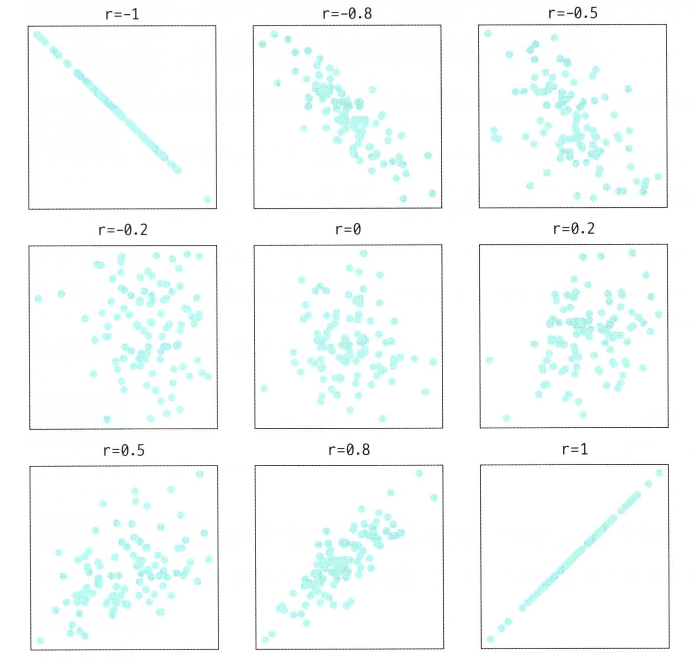

In [12]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

* numpy는 상관계수는 corrcoef함수로 계산 
* 반환값은 공분산의 경우와 마찬가지로 상관행렬(correlation matrix) 형태

In [13]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [14]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 2차원 데이터의 시각화

### 산점도

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

* 아래 그림은 가로축이 영어 점수, 세로축이 수학 점수인 산점도(scatter plot)입니다.

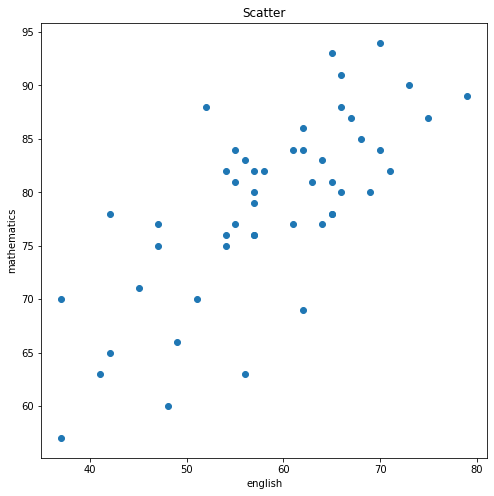

In [17]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.title("Scatter")
plt.show()

### 회귀직선

In [19]:
poly_fit

array([ 0.621, 42.601])

In [20]:
poly_1d

poly1d([ 0.621, 42.601])

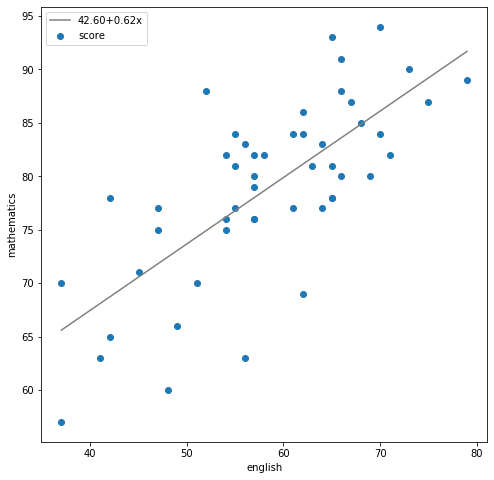

In [21]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

### 히트맵

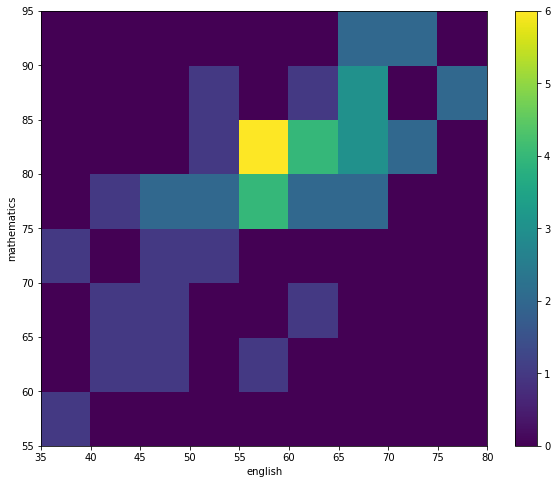

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

## 앤스컴의 예

In [30]:
df.describe()

,english,mathematics
count,50.00,50.000
mean,58.38,78.880
std,9.80,8.414
min,37.00,57.000
25%,54.00,76.000
50%,57.50,80.000
75%,65.00,84.000
max,79.00,94.000


In [26]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [28]:
anscombe_data

array([[[10.  ,  8.04],
        [ 8.  ,  6.95],
        [13.  ,  7.58],
        [ 9.  ,  8.81],
        [11.  ,  8.33],
        [14.  ,  9.96],
        [ 6.  ,  7.24],
        [ 4.  ,  4.26],
        [12.  , 10.84],
        [ 7.  ,  4.82],
        [ 5.  ,  5.68]],

       [[10.  ,  9.14],
        [ 8.  ,  8.14],
        [13.  ,  8.74],
        [ 9.  ,  8.77],
        [11.  ,  9.26],
        [14.  ,  8.1 ],
        [ 6.  ,  6.13],
        [ 4.  ,  3.1 ],
        [12.  ,  9.13],
        [ 7.  ,  7.26],
        [ 5.  ,  4.74]],

       [[10.  ,  7.46],
        [ 8.  ,  6.77],
        [13.  , 12.74],
        [ 9.  ,  7.11],
        [11.  ,  7.81],
        [14.  ,  8.84],
        [ 6.  ,  6.08],
        [ 4.  ,  5.39],
        [12.  ,  8.15],
        [ 7.  ,  6.42],
        [ 5.  ,  5.73]],

       [[ 8.  ,  6.58],
        [ 8.  ,  5.76],
        [ 8.  ,  7.71],
        [ 8.  ,  8.84],
        [ 8.  ,  8.47],
        [ 8.  ,  7.04],
        [ 8.  ,  5.25],
        [19.  , 12.5 ],
        [ 

In [18]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


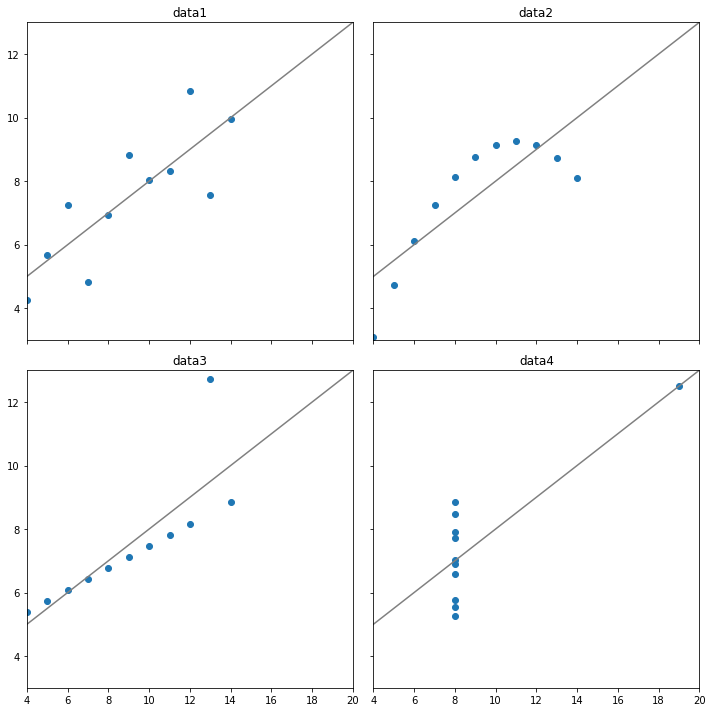

In [19]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()